In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.integrate import odeint
import seaborn as sns

Files exist and are not empty


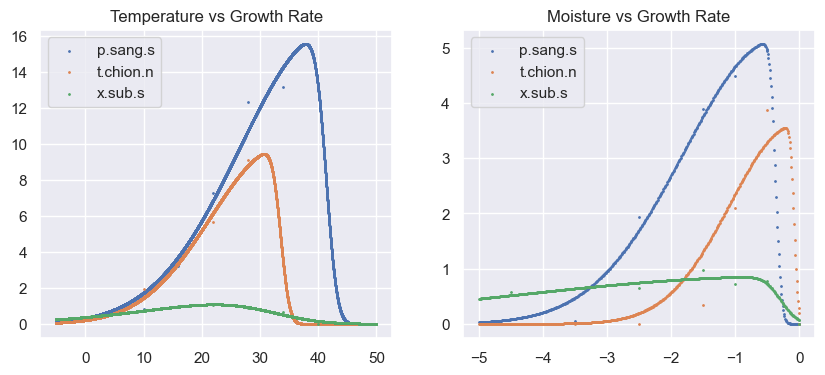

In [131]:
if  os.path.exists('./3fungi_data/fungi_p.sang.s_temp.csv') == 0 and os.path.exists('./3fungi_data/fungi_t.chion.n_temp.csv') == 0 and os.path.exists('./3fungi_data/fungi_x.sub.s_temp.csv') == 0\
    and os.path.exists('./3fungi_data/fungi_p.sang.s_moisture.csv') == 0 and os.path.exists('./3fungi_data/fungi_t.chion.n_moisture.csv') == 0 and os.path.exists('./3fungi_data/fungi_x.sub.s_moisture.csv') == 0:
    fungi_temp_growth = pd.read_csv('./original_data/Fungi_temperature_curves.csv')
    fungi_species = ["p.sang.s", "t.chion.n", "x.sub.s"]
    ### Selecting the required columns with the required species
    required_data = fungi_temp_growth[fungi_temp_growth['species'].isin(fungi_species)]
    ### export to csv
    required_data.to_csv('./3fungi_data/fungi_temp.csv', index=False)
    ### split the data into three dataframes according to the species
    p_data = required_data[required_data['species'] == 'p.sang.s']
    t_data = required_data[required_data['species'] == 't.chion.n']
    x_data = required_data[required_data['species'] == 'x.sub.s']
    ### export to csv respectively
    p_data.to_csv('./3fungi_data/fungi_p.sang.s_temp.csv', index=False)
    t_data.to_csv('./3fungi_data/fungi_t.chion.n_temp.csv', index=False)
    x_data.to_csv('./3fungi_data/fungi_x.sub.s_temp.csv', index=False)
    ### then doing the same for the moisture data
    fungi_temp_growth = pd.read_csv('./original_data/Fungi_moisture_curves.csv')
    fungi_species = ["p.sang.s", "t.chion.n", "x.sub.s"]
    ### Selecting the required columns with the required species
    required_data = fungi_temp_growth[fungi_temp_growth['species'].isin(fungi_species)]
    ### export to csv
    required_data.to_csv('./3fungi_data/fungi_moisture.csv', index=False)
    ### split the data into three dataframes according to the species
    p_data = required_data[required_data['species'] == 'p.sang.s']
    t_data = required_data[required_data['species'] == 't.chion.n']
    x_data = required_data[required_data['species'] == 'x.sub.s']
    ### export to csv respectively
    p_data.to_csv('./3fungi_data/fungi_p.sang.s_moist.csv', index=False)
    t_data.to_csv('./3fungi_data/fungi_t.chion.n_moist.csv', index=False)
    x_data.to_csv('./3fungi_data/fungi_x.sub.s_moist.csv', index=False)
else:
    print('Files exist and are not empty')
    ### read temperature data
    p_temp_data = pd.read_csv('./3fungi_data/fungi_p.sang.s_temp.csv')
    t_temp_data = pd.read_csv('./3fungi_data/fungi_t.chion.n_temp.csv')
    x_temp_data = pd.read_csv('./3fungi_data/fungi_x.sub.s_temp.csv')
    ### read moisture data
    p_moist_data = pd.read_csv('./3fungi_data/fungi_p.sang.s_moist.csv')
    t_moist_data = pd.read_csv('./3fungi_data/fungi_t.chion.n_moist.csv')
    x_moist_data = pd.read_csv('./3fungi_data/fungi_x.sub.s_moist.csv')
    ### plot the scatter plot between the temperature and growth rate
    ### Q: what is s here?
    ### A: s is the size of the marker
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title('Temperature vs Growth Rate')
    plt.scatter(p_temp_data['temp_c'], p_temp_data['hyphal_rate'], label='p.sang.s', s=1)
    plt.scatter(t_temp_data['temp_c'], t_temp_data['hyphal_rate'], label='t.chion.n', s=1)
    plt.scatter(x_temp_data['temp_c'], x_temp_data['hyphal_rate'], label='x.sub.s', s=1)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title('Moisture vs Growth Rate')
    plt.scatter(p_moist_data['matric_pot'], p_moist_data['hyphal_rate'], label='p.sang.s', s=1)
    plt.scatter(t_moist_data['matric_pot'], t_moist_data['hyphal_rate'], label='t.chion.n', s=1)
    plt.scatter(x_moist_data['matric_pot'], x_moist_data['hyphal_rate'], label='x.sub.s', s=1)
    plt.legend()
    plt.show()

In [132]:
### compitition model
### conditions: 1. 22C
r_p = p_temp_data[p_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
r_t = t_temp_data[t_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
r_x = x_temp_data[x_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
print(r_p, r_t, r_x)
p_Decomposition_rate = 0.3743/122
t_Decomposition_rate = 0.2906/122
x_Decomposition_rate = 0.0855/122
s_pt = t_Decomposition_rate/p_Decomposition_rate
s_px = x_Decomposition_rate/p_Decomposition_rate
s_tp = p_Decomposition_rate/t_Decomposition_rate
s_tx = x_Decomposition_rate/t_Decomposition_rate
s_xp = p_Decomposition_rate/x_Decomposition_rate
s_xt = t_Decomposition_rate/x_Decomposition_rate
n_p, n_t, n_x = 3000, 3000, 3000
### unit of density: s micrograms dry mass per cubic centimer at 1 cm to g/m3
init_p, init_t, init_x = 20, 60, 1740

6.904741222194023 6.196867982896736 1.0805279694467211


In [133]:
def diff(w, t):
    p, t, x = w
    return np.array([r_p * p * (1 - p / n_p - s_pt * t / n_t - s_px * x / n_x), r_t * t * (1 - t / n_t - s_tp * p / n_p - s_tx * x / n_x), r_x * x * (1 - x / n_x - s_xp * p / n_p - s_xt * t / n_t)])

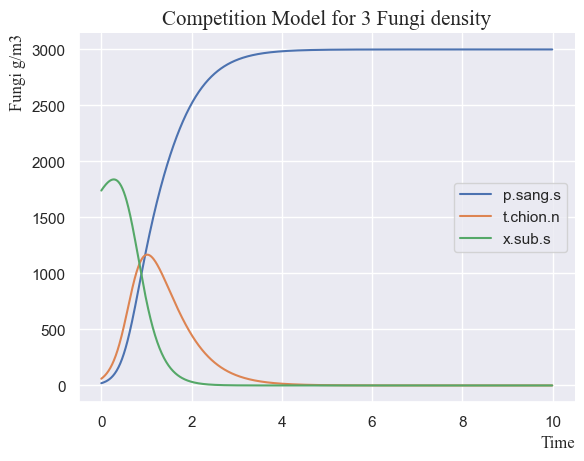

In [136]:

time = np.arange(0, 10, 0.01)
solution = odeint(diff, [init_p, init_t, init_x], time)
plt.title('Competition Model for 3 Fungi density', font={'family':'Times New Roman', 'size':15})
plt.xlabel('Time', font={'family':'Times New Roman', 'size':12}, loc='right')
plt.ylabel('Fungi g/m3', font={'family':'Times New Roman', 'size':12}, loc='top')
plt.plot(time, solution[:, 0], label='p.sang.s')
plt.plot(time, solution[:, 1], label='t.chion.n')
plt.plot(time, solution[:, 2], label='x.sub.s')
plt.legend()
sns.set()
sns.despine()
plt.show()